# Detectron2: Inference on an Image

<img src="https://dl.fbaipublicfiles.com/detectron2/Detectron2-Logo-Horz.png" width="500">

Detectron2 is an open-source project by Facebook AI Research (FAIR).

There are numerous models in the [Model Zoo](https://github.com/facebookresearch/detectron2/blob/master/MODEL_ZOO.md)


# Step 1: Installs & Imports

## Install Dependencies

In [ ]:
# Install dependencies: 
!pip install pyyaml==5.1 pycocotools>=2.0.1
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())
!gcc --version
# opencv is pre-installed on colab

1.6.0+cu101 True
gcc (Ubuntu 7.5.0-3ubuntu1~18.04) 7.5.0
Copyright (C) 2017 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.



In [ ]:
# install detectron2: (Colab has CUDA 10.1 + torch 1.7)
# See https://detectron2.readthedocs.io/tutorials/install.html for instructions
import torch
assert torch.__version__.startswith("1.7")
!pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.7/index.html

Looking in links: https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.6/index.html
     |████████████████████████████████| 6.6MB 4.6MB/s 
     |████████████████████████████████| 2.2MB 11.2MB/s 
  Created wheel for fvcore: filename=fvcore-0.1.2.post20201016-cp36-none-any.whl size=44196 sha256=4ddbe964da50239bea1cb9b40c2c84869d0ff539da15569a2974c9610aabb83f
  Stored in directory: /root/.cache/pip/wheels/f3/3f/35/86873c1ddea45a9fb1ba7921232ea15c570165a9d4f4d831c7
Successfully built fvcore
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: Pillow 7.0.0
    Uninstalling Pillow-7.0.0:
      Successfully uninstalled Pillow-7.0.0


## Import Libraries

In [ ]:
# Some basic setup:
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import os, json, cv2, random
from google.colab.patches import cv2_imshow

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

## Where is this code coming from?

*   GitHub: https://github.com/facebookresearch/detectron2




# Step 2: Load the Data

*   https://cocodataset.org/#home

In [ ]:
# Bike - https://farm1.staticflickr.com/103/300626851_2ef81f255a_z.jpg
# Living Room - https://farm5.staticflickr.com/4017/4445210526_45c53f6dc2_z.jpg
# Tennis Player - https://farm4.staticflickr.com/3334/3593807246_67b87f30b5_z.jpg

!wget https://farm5.staticflickr.com/4017/4445210526_45c53f6dc2_z.jpg -q -O input.jpg

# Step 3: Visualize the Data

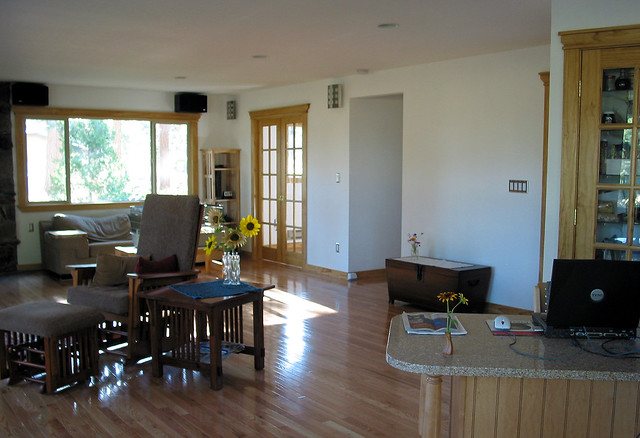

In [ ]:
# Show an image with OpenCV
im = cv2.imread("./input.jpg")
cv2_imshow(im)

# Step 4: Define the Model

Now create a detectron2 config and a detectron2 `DefaultPredictor` to run inference on this image.

In [ ]:
cfg = get_cfg()
# add project-specific config (e.g., TensorMask)
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set threshold for this model
# Find a model from detectron2's model zoo.
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")


# Step 5: Inference on an image

In [ ]:
predictor = DefaultPredictor(cfg)
outputs = predictor(im)

model_final_f10217.pkl: 178MB [00:02, 84.0MB/s]                           
/usr/local/lib/python3.6/dist-packages/detectron2/layers/wrappers.py:226: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  /pytorch/torch/csrc/utils/python_arg_parser.cpp:766.)
  return x.nonzero().unbind(1)


In [ ]:
#See https://detectron2.readthedocs.io/tutorials/models.html#model-output-format for specification
print(outputs["instances"].pred_classes)
print(outputs["instances"].pred_boxes)

tensor([75, 63, 56, 60, 73, 58, 75, 57, 58, 56, 57, 64], device='cuda:0')
Boxes(tensor([[221.3764, 252.4421, 241.3524, 285.5915],
        [535.2395, 259.8344, 639.9944, 333.2356],
        [ 65.8520, 197.6421, 200.7584, 370.2194],
        [146.6775, 265.2195, 272.4433, 390.9536],
        [402.6161, 313.2450, 467.1548, 335.7933],
        [200.4951, 212.5457, 262.5862, 275.2628],
        [410.3445, 242.6337, 419.2426, 256.7619],
        [ 40.9324, 209.2831, 138.8524, 282.5924],
        [436.1124, 288.9527, 470.0967, 333.7582],
        [  3.8902, 299.9496, 105.0208, 391.6136],
        [ 49.4629, 195.4949, 209.2391, 285.2029],
        [494.0675, 314.7842, 511.1188, 329.4524]], device='cuda:0'))


# Step 6: Visualize the Output

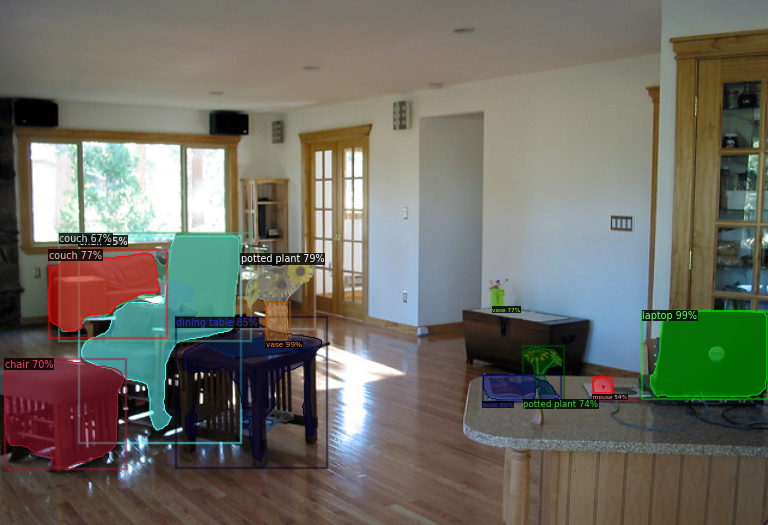

In [ ]:
v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
cv2_imshow(out.get_image()[:, :, ::-1])

# Step 7: Inference on a video

## Display the video

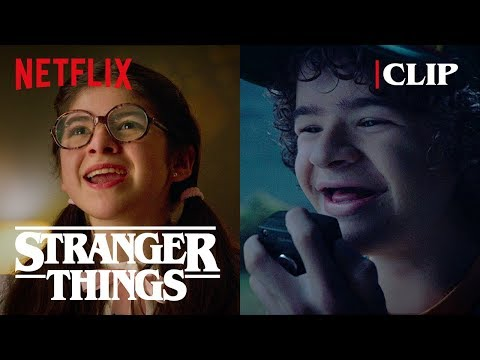

In [ ]:
from IPython.display import YouTubeVideo, display
video = YouTubeVideo("ehtsmxu1w10", width=500)
display(video)

## Install Dependencies

In [ ]:
# Install dependencies, download the video, and crop 5 seconds for processing
!pip install youtube-dl
!pip uninstall -y opencv-python-headless opencv-contrib-python
!apt install python3-opencv  # the one pre-installed have some issues
!youtube-dl https://www.youtube.com/watch?v=ehtsmxu1w10 -f 22 -o video.mp4
!ffmpeg -i video.mp4 -t 00:00:06 -c:v copy video-clip.mp4

     |████████████████████████████████| 1.8MB 5.1MB/s 
Uninstalling opencv-contrib-python-4.1.2.30:
  Successfully uninstalled opencv-contrib-python-4.1.2.30
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  python3-opencv
0 upgraded, 1 newly installed, 0 to remove and 21 not upgraded.
Need to get 534 kB of archives.
After this operation, 2,941 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/universe amd64 python3-opencv amd64 3.2.0+dfsg-4ubuntu0.1 [534 kB]
Fetched 534 kB in 1s (447 kB/s)
Selecting previously unselected package python3-opencv.
(Reading database ... 144611 files and directories currently installed.)
Preparing to unpack .../python3-opencv_3.2.0+dfsg-4ubuntu0.1_amd64.deb ...
Unpacking python3-opencv (3.2.0+dfsg-4ubuntu0.1) ...
Setting up python3-opencv (3.2.0+dfsg-4ubuntu0.1) ...
[youtube] ehtsmxu1w10: Downloading webpage
[download]

## Run frame-by-frame inference

In [ ]:
!git clone https://github.com/facebookresearch/detectron2
!python detectron2/demo/demo.py --config-file detectron2/configs/COCO-PanopticSegmentation/panoptic_fpn_R_101_3x.yaml --video-input video-clip.mp4 --confidence-threshold 0.6 --output video-output.mkv \
  --opts MODEL.WEIGHTS detectron2://COCO-PanopticSegmentation/panoptic_fpn_R_101_3x/139514519/model_final_cafdb1.pkl

Cloning into 'detectron2'...
remote: Enumerating objects: 13, done.
remote: Counting objects: 100% (13/13), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 7693 (delta 1), reused 3 (delta 1), pack-reused 7680
Receiving objects: 100% (7693/7693), 3.43 MiB | 23.75 MiB/s, done.
Resolving deltas: 100% (5480/5480), done.
Failed to load OpenCL runtime
[10/18 13:19:25 detectron2]: Arguments: Namespace(confidence_threshold=0.6, config_file='detectron2/configs/COCO-PanopticSegmentation/panoptic_fpn_R_101_3x.yaml', input=None, opts=['MODEL.WEIGHTS', 'detectron2://COCO-PanopticSegmentation/panoptic_fpn_R_101_3x/139514519/model_final_cafdb1.pkl'], output='video-output.mkv', video_input='video-clip.mp4', webcam=False)
[10/18 13:19:31 fvcore.common.checkpoint]: Loading checkpoint from detectron2://COCO-PanopticSegmentation/panoptic_fpn_R_101_3x/139514519/model_final_cafdb1.pkl
[10/18 13:19:31 fvcore.common.download]: Downloading from https://dl.fbaipublicfiles.com/detectron2/COC

## Download the results

In [ ]:
# Download the results
from google.colab import files
files.download('video-output.mkv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from IPython.display import HTML
from base64 import b64encode
mp4 = open('video-output.mkv','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)
